<a href="https://colab.research.google.com/github/pedrohspassos/conversao_temperatura_rna/blob/main/criando_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Por se tratar de uma relação deterministica, isso é, para cada valor de graus Celsius eu tenho um valor em Fahrenheit o uso de redes neurais são se torna necessário.
- Redes neurais se dão melhor com problemas onde temos que indentificar padrões.
- Porém a titulo de aprendizagem vou utilizado redes neurais nesse problema.
- Aplicação mais simples
  - Não foi usado função de ativação por exemplo.

- Trata-se de um problema de regressão

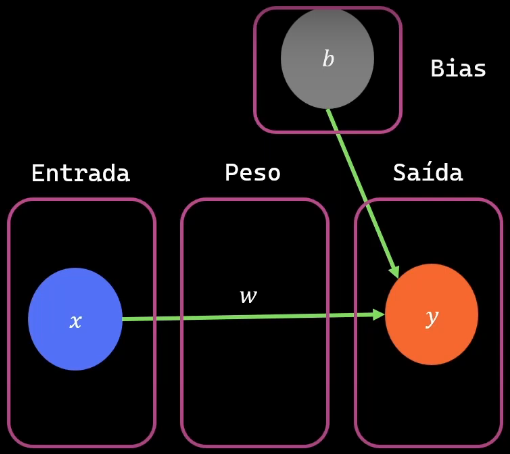


# Importando Bibliotecas e Definindo alguns estilos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
# Definindo estilos de plotagem
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

# Criando um dataset

In [6]:
# Gerando os dados de temperatura Celsius para Fahrenheit
def get_linear_curve(x, w, b=0, noise_scale=0):
    return w * x + b + noise_scale*np.random.randn(len(x))

In [7]:
# Criando conjunto de dados de entrada (entre -10 e 10 com passos de 0.5 entre cada um deles)
x = np.arange(-10, 10, 0.5)

# Gerando a função que representa a relação da temperatura Celsius para Fahrenheit
Y= get_linear_curve(x, 1.8, 32)

In [8]:
# Verificando se para todos os valres de x (Celsius) foi gerado um valor de y (Fahrenheit)
x.shape, Y.shape

((40,), (40,))

Text(0, 0.5, '°F')

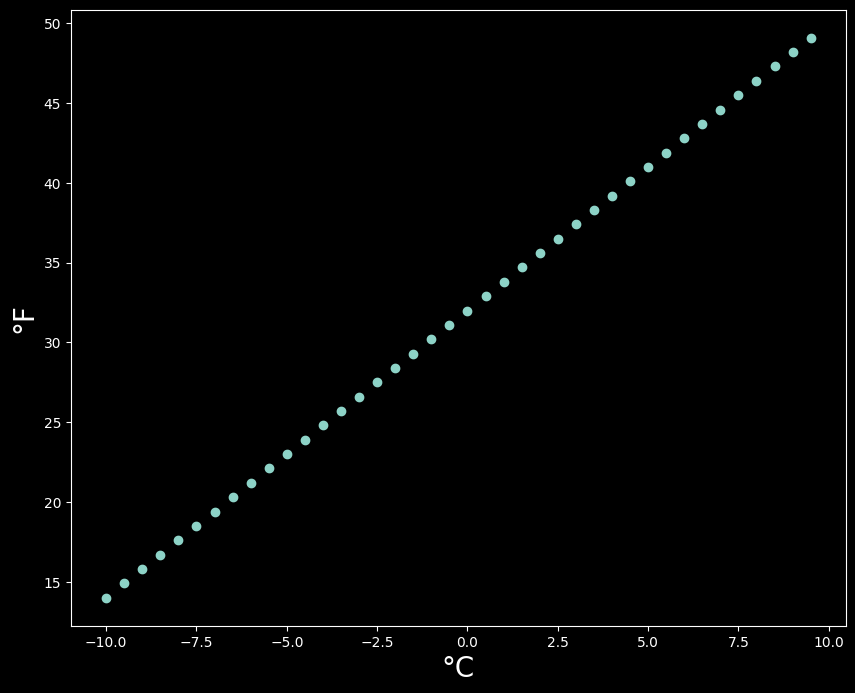

In [9]:
# Plotando o gráfico
plt.scatter(x, Y)
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

#Modelo

- Definição de algumas funções
  - Feedforward
  - Calcular a perda
  - Backpropagation

- Inicializar peso e bias

In [10]:
# Feedforward: fluxo de dados através das camadas de uma rede neural de entrada até a saída
# Não estamos trabalhando com uma função de ativação ou neurônios ocultos

# Retorna o valor predito (y)
def forward(inputs, w, b):
  return w*inputs + b

In [11]:
# Função de perda (erro entre o valor real e o predito)
# Retorna um array da diferença quadratica em cada posição

def mse(Y, y):
  return (Y-y)**2


In [12]:
# Função de ajuste dos peso e bias
'''
inputs - valores de entrada da rede (x)
outputs - valores de saída da rede (previsão - y)
targets - valores reais da rede (alvo - Y)
w - pesos
b - bias
lr - taxa de aprendizado
'''

def backpropagation(inputs, outputs, targets, w , b,  lr):

  # Derivadas do erro em relação ao peso e em relação ao bias
  # Usadas para atualização dos pesos

  # Usando a regra da cadeia (Derivada do erro em relação ao valor predito -- Derivada do valor predito em relação ao peso)
  dw = lr*(-2*inputs*(targets-outputs)).mean()

  # Usando a regra da cadeia (Derivada do erro em relação ao valor predito -- Derivada do valor predito em relação ao peso)
  db = lr*(-2*(targets-outputs)).mean()

  # Atualizando o peso e o bias
  w -= dw
  b -= db

  return w, b

In [13]:
# Ajustando o modelo
def model_fit(inputs, target, w, b, epochs = 200, lr = 0.001):
  for epoch in range(epochs):

    outputs = forward(inputs, w, b)
    loss = np.mean(mse(target, outputs))
    w,b = backpropagation(inputs, outputs, target, w, b, lr)

    # Mostrando apenas 10 passos
    if (epoch+1) % (epochs/10) == 0:
      print(f'Epoch [{epoch+1}]: Loss = [{loss:.4f}]')

  return w, b

In [14]:
# Criando conjunto de dados de entrada (entre -10 e 10 com passos de 0.5 entre cada um deles)
x = np.arange(-10, 10, 0.5)

# Gerando a função que representa a relação da temperatura Celsius para Fahrenheit
Y= get_linear_curve(x, 1.8, 32)

In [28]:
# Inicialização

# Pegando um valor inicial do peso de maneira randômica (de acordo com uma distribuição normal)
w = np.random.randn(1)

# Definindo valor do bias
b = np.zeros(1)

In [29]:
# Chamando o modelo

w, b = model_fit(x, Y, w, b, epochs=500, lr=0.001)

print(f'w = {w.item():.2f}, b = {b.item():.2f}')

Epoch [50]: Loss = [840.7739]
Epoch [100]: Loss = [688.4632]
Epoch [150]: Loss = [563.7711]
Epoch [200]: Loss = [461.6629]
Epoch [250]: Loss = [378.0481]
Epoch [300]: Loss = [309.5774]
Epoch [350]: Loss = [253.5078]
Epoch [400]: Loss = [207.5934]
Epoch [450]: Loss = [169.9948]
Epoch [500]: Loss = [139.2059]
w = 1.71, b = 20.21


Text(0, 0.5, '°F')

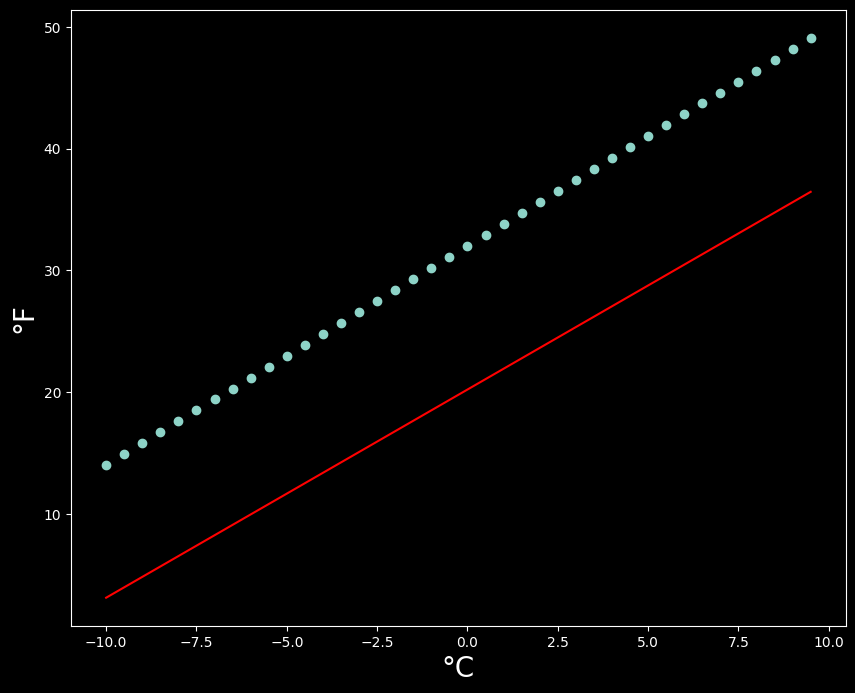

In [31]:
# Plotando os valores reais e a reta prevista
plt.scatter(x,Y)
plt.plot(x, get_linear_curve(x, w, b), color='red')
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

Epoch [100]: Loss = [688.8724]
Epoch [200]: Loss = [461.9372]
Epoch [300]: Loss = [309.7613]
Epoch [400]: Loss = [207.7167]
Epoch [500]: Loss = [139.2887]
Epoch [600]: Loss = [93.4028]
Epoch [700]: Loss = [62.6332]
Epoch [800]: Loss = [41.9999]
Epoch [900]: Loss = [28.1639]
Epoch [1000]: Loss = [18.8859]
w = 1.77, b = 27.66


Text(0, 0.5, '°F')

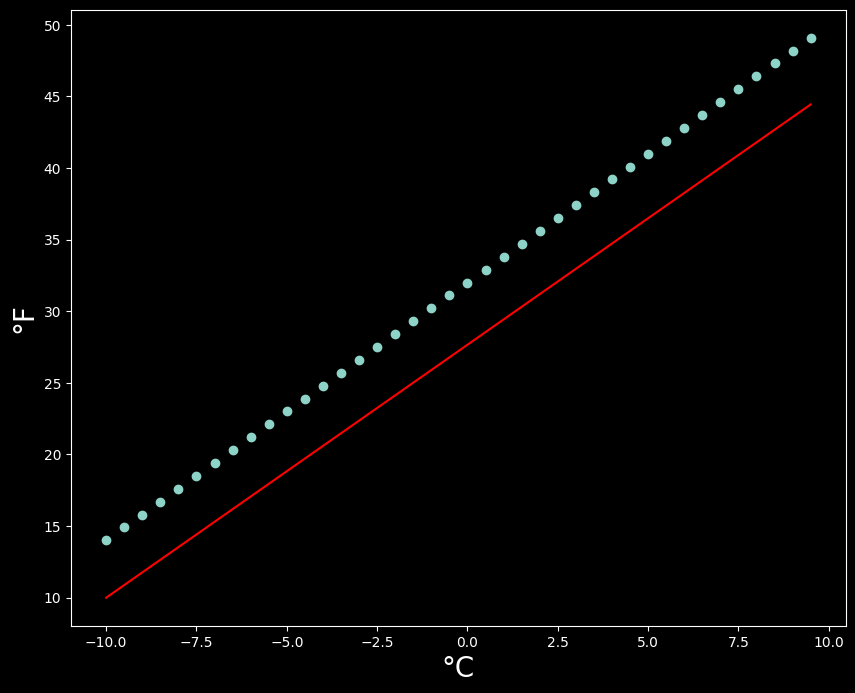

In [37]:
# Inicialização

# Pegando um valor inicial do peso de maneira randômica (de acordo com uma distribuição normal)
w = np.random.randn(1)

# Definindo valor do bias
b = np.zeros(1)

# Chamando o modelo

w, b = model_fit(x, Y, w, b, epochs=1000, lr=0.001)

print(f'w = {w.item():.2f}, b = {b.item():.2f}')


# Plotando os valores reais e a reta prevista
plt.scatter(x,Y)
plt.plot(x, get_linear_curve(x, w, b), color='red')
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

Epoch [150]: Loss = [93.8212]
Epoch [300]: Loss = [8.4690]
Epoch [450]: Loss = [0.7645]
Epoch [600]: Loss = [0.0690]
Epoch [750]: Loss = [0.0062]
Epoch [900]: Loss = [0.0006]
Epoch [1050]: Loss = [0.0001]
Epoch [1200]: Loss = [0.0000]
Epoch [1350]: Loss = [0.0000]
Epoch [1500]: Loss = [0.0000]
w = 1.80, b = 32.00


Text(0, 0.5, '°F')

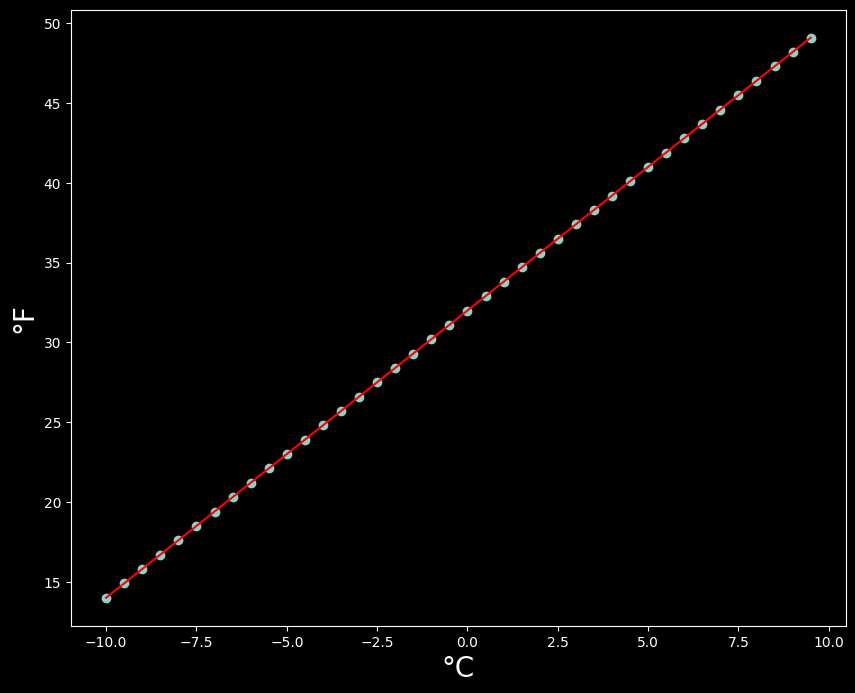

In [58]:
# Inicialização

# Pegando um valor inicial do peso de maneira randômica (de acordo com uma distribuição normal)
w = np.random.randn(1)

# Definindo valor do bias
b = np.zeros(1)

# Chamando o modelo

w, b = model_fit(x, Y, w, b, epochs=1500, lr=0.004)

print(f'w = {w.item():.2f}, b = {b.item():.2f}')


# Plotando os valores reais e a reta prevista
plt.scatter(x,Y)
plt.plot(x, get_linear_curve(x, w, b), color='red')
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)